Import Libraries and Data

In [114]:
#Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Import Data
df = pd.read_csv('movie_metadata.csv').dropna()

#Add Profit column equal to gross revenue minus budget
df['profit'] = df.gross - df.budget 

#Calculate z-scores and remove numeric outliers
#select column names that include the data type float
numcols = df.select_dtypes(include=float).keys()
#Create a dataframe of zscores using the scipy library
zscores = df[numcols].apply(stats.zscore)
#Create a list of outliers by listing rows that contain a zscore above 3 or below -3
for col in zscores:
    outliers = zscores.index[abs(zscores[col]) > 3].tolist()
#drop outliers
df = df.drop(outliers)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3736 entries, 1 to 5041
Data columns (total 29 columns):
color                        3736 non-null object
director_name                3736 non-null object
num_critic_for_reviews       3736 non-null float64
duration                     3736 non-null float64
director_facebook_likes      3736 non-null float64
actor_3_facebook_likes       3736 non-null float64
actor_2_name                 3736 non-null object
actor_1_facebook_likes       3736 non-null float64
gross                        3736 non-null float64
genres                       3736 non-null object
actor_1_name                 3736 non-null object
movie_title                  3736 non-null object
num_voted_users              3736 non-null int64
cast_total_facebook_likes    3736 non-null int64
actor_3_name                 3736 non-null object
facenumber_in_poster         3736 non-null float64
plot_keywords                3736 non-null object
movie_imdb_link              3736 non-

Scatterplot Function

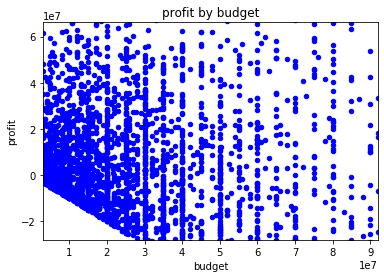

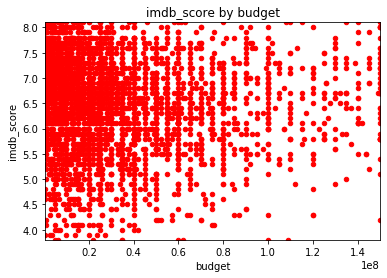

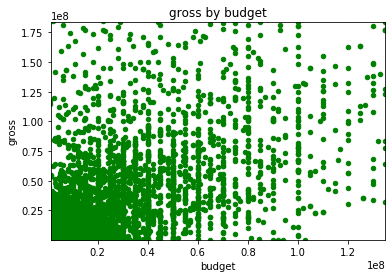

In [115]:
#Function to create scatter plots of the data, low and high set the percentile to be graphed
def scatter (data, xcol, ycol, color = 'green', low = 0, high = 1):
    data.plot(kind = 'scatter', x=xcol, y=ycol, color = color)
    plt.xlim(data[xcol].quantile([low, high]))
    plt.ylim(data[ycol].quantile([low, high]))
    plt.title(ycol + " by " + xcol)
    plt.show()

scatter(df, 'budget', 'profit', color = 'blue', low = .1, high =.9)
scatter(df, 'budget', 'imdb_score', color = 'red', low = .02, high = .97)
scatter(df, 'budget', 'gross', low = .05, high = .95)


Genre Histogram Function

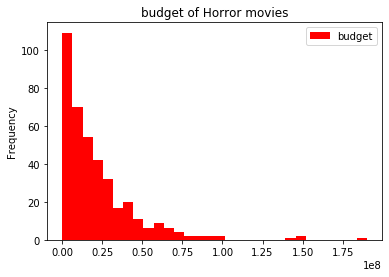

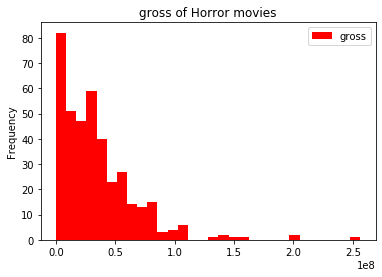

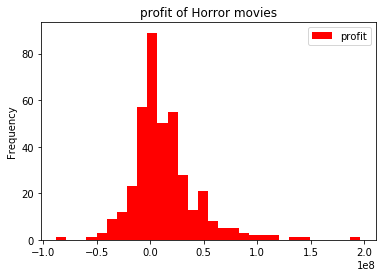

In [116]:
#Function to creat histograms containing data about an attribute of all films in a given genre
def genre_hist (data, genre, attribute = 'profit', bins = 30, color = 'red'):
    genredf = data[[genre in x for x in data.genres]]
    genredf.plot(kind='hist', y=attribute, bins = bins, color = color)
    plt.title(attribute + ' of ' + genre + ' movies')
    
genre_hist(df, 'Horror', attribute = 'budget')

genre_hist(df, 'Horror', attribute = 'gross')

genre_hist(df, 'Horror', attribute = 'profit')


,actor_1_facebook_likes,gross
actor_1_facebook_likes,1.000000,0.146899
gross,0.146899,1.000000


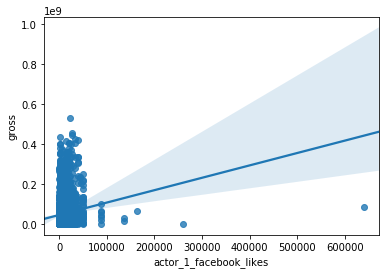

In [123]:
sns.regplot('actor_1_facebook_likes', 'gross', data = df)

df[['actor_1_facebook_likes', 'gross']].corr()